# Аналитика заведений общественного питания в Москве.

<a name="table_of_contents"></a>
# План:
1) [Загрузить библиотеки и базы данных.](#stage_1)
    * Посмотреть на сами данные (пропуски, дубликаты, типы данных)
2) [Анализ данных.](#stage_2)
- [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#s_1)
- [Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.](#s_2)
- [Для какого вида объекта общественного питания характерно сетевое распространение?](#s_3)
- [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#s_4)
- [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#s_5)
- [Выделите в отдельный столбец информацию об улице из столбца address .](#s_6)
- [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#s_7)
- [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#s_8)
- [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#s_9)

3) [Презентация](#stage_3)

4) [Вывод и рекомендации](#stage_4)

<a name="stage_1"></a>
## ШАГ 1.
[К оглавлению](#table_of_contents)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import seaborn as sns
import datetime as dt
from io import BytesIO
import requests
from bs4 import BeautifulSoup as bs

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
display(rest_data.head(50))

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
#дубликаты
rest_data.duplicated().sum()

0

In [6]:
#пропуски
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

#### Вывод по первому шагу:
1. Были загружены библиотеки и таблицы.
2. Данные "целые", пропусков нет, дубликатов нет.



<a name="stage_2"></a>
## ШАГ 2. Анализ данных.
[К оглавлению](#table_of_contents)

<a name="s_1"></a>
### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
[К оглавлению](#table_of_contents)

Здесь можно исследовать каких типов общ. питаниябольше и также посмотреть где больше посадочных мест.

In [7]:
rest_data.groupby('object_type')['number'].sum().to_frame('number').sort_values(by='number', ascending=False).head(10)

,number
object_type,
столовая,336948
кафе,242228
ресторан,221266
предприятие быстрого обслуживания,39522
бар,37231
буфет,29911
кафетерий,3631
закусочная,2739
магазин (отдел кулинарии),1526


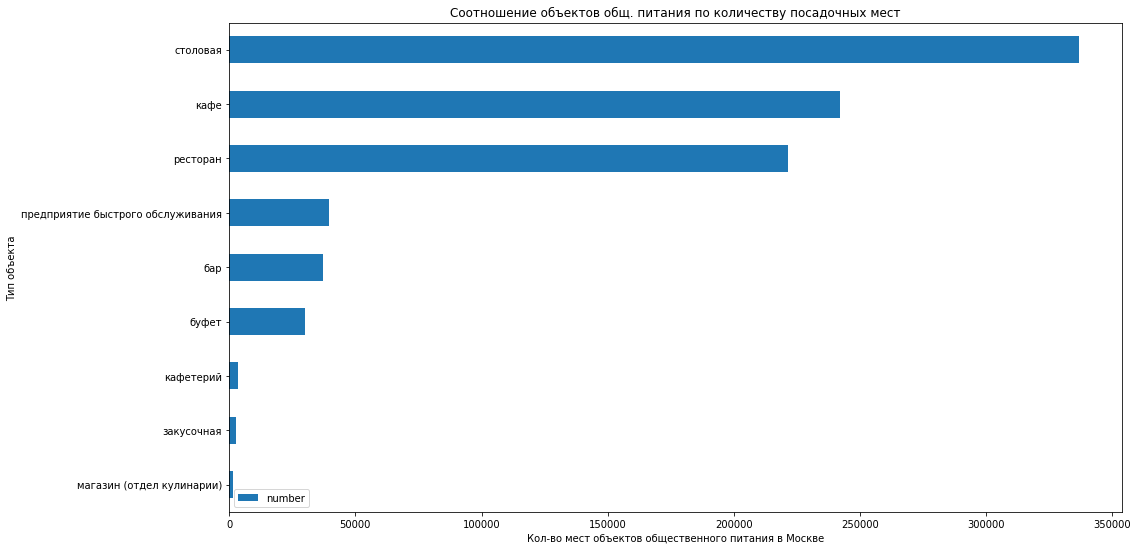

<Figure size 1080x1800 with 0 Axes>

In [8]:
rest_data.groupby(by='object_type').agg({'number':'sum'}).sort_values(by='number', inplace=False).plot(kind='barh',figsize=(16, 9))
plt.title('Соотношение объектов общ. питания по количеству посадочных мест')
plt.xlabel('Кол-во мест объектов общественного питания в Москве')
plt.ylabel('Тип объекта')
plt.figure(figsize=((15, 25)))
plt.show()

#### Вывод по графику:
1. Логично, что в столовых больше мест - сюда же включены и университетские/школьные столовые, а значит столы длинные, вместо стульев чаще скамейки.
2. Кафе вторые вторые по топу - они есть почти в каждом доме на первых этажах.
3. Рестораны закрывают тройку лидеров. Для ресторанов существуют особые требования в проектировке и дизайне зала, а значит они будут уступать более общественным кафе и столовым.
4. Внизу списка маленькие по площади заведения, которые не подразумевают долгое времяпрепровождение. 

In [9]:
rest_data.groupby('object_type')['object_name'].count().to_frame('object_name').sort_values(by='object_name', ascending=False).head(10)

,object_name
object_type,
кафе,6099
столовая,2587
ресторан,2285
предприятие быстрого обслуживания,1923
бар,856
буфет,585
кафетерий,398
закусочная,360
магазин (отдел кулинарии),273


<Figure size 576x1152 with 0 Axes>

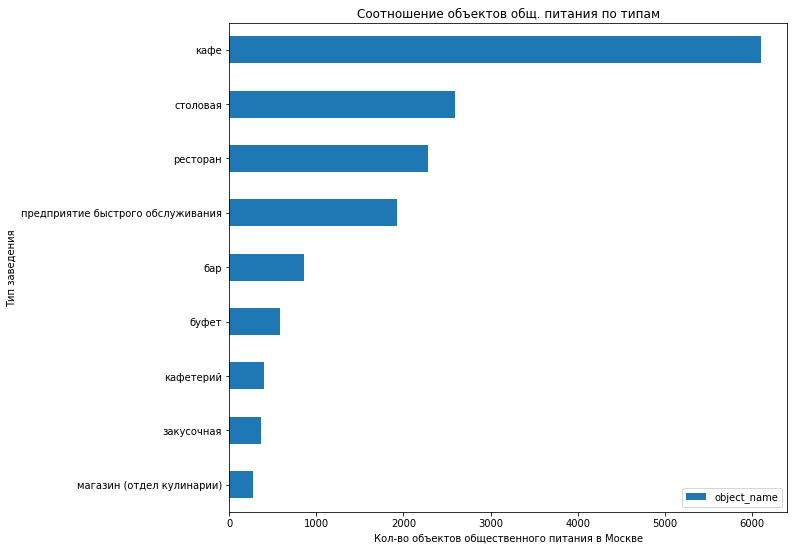

In [10]:
plt.figure(figsize=((8, 16)))
rest_data.groupby(by='object_type').agg({'object_name':'count'}).sort_values(by='object_name', inplace=False).plot(kind='barh',figsize=(10, 9))
plt.title('Соотношение объектов общ. питания по типам')
plt.xlabel('Кол-во объектов общественного питания в Москве')
plt.ylabel('Тип заведения')
plt.show()

#### Вывод по графику:
1. Кафе больше - им нужно меньше места, персонала, и т.д. Легче открыться где-нибудь.
2. Столовые есть в каждом учебном заведении и местах с большим скоплением объектов деловой и производственной среды.
3. Ресторанами усыпан центр города и "богемные" местечки.
4. Остальные располагаются практчиески рядом со всеми.

<a name="s_2"></a>
### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
[К оглавлению](#table_of_contents)

In [11]:
rest_data.groupby('chain')['object_name'].count().sort_values()

chain
да      2968
нет    12398
Name: object_name, dtype: int64

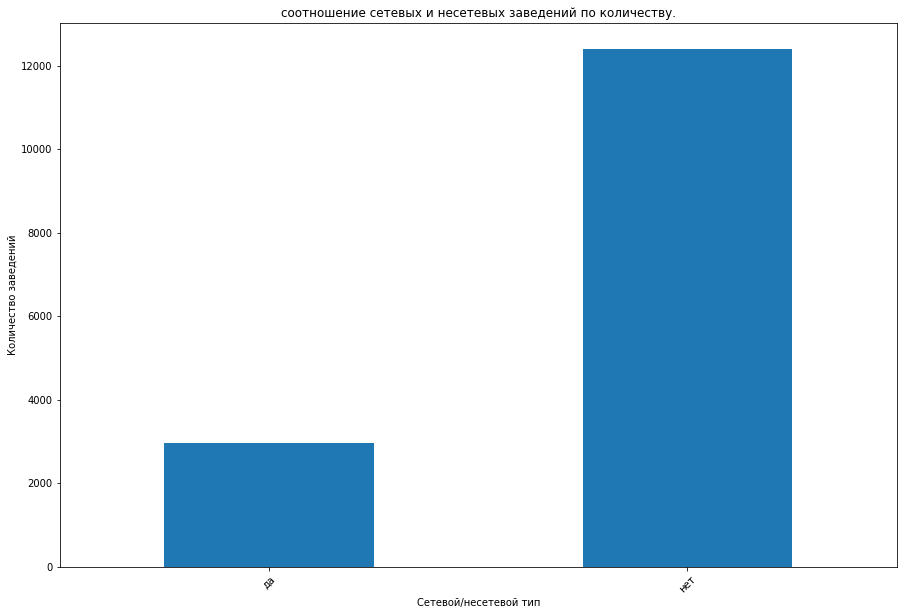

In [12]:
plt.figure(figsize = (15, 10))
ax = rest_data.groupby('chain')['object_name'].count().sort_values().plot(kind='bar')
plt.title('соотношение сетевых и несетевых заведений по количеству.')
ax.set_xlabel('Сетевой/несетевой тип')
ax.set_ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.show()

#### Вывод по графику:
1. Оказалось, что сетевых в 3-4 раза меньше чем "особенных".
    * Думаю здесь сыграло то, что в городе большое количество различных столовых (в учебных заведениях и т.д.) и ресторанов(дорогих, особенных и т.д.).

<a name="s_3"></a>
### Для какого вида объекта общественного питания характерно сетевое распространение?
[К оглавлению](#table_of_contents)

In [13]:
rest_data_pivot=rest_data.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc = 'count').rename_axis(None, axis=1)
rest_data_pivot

,да,нет
object_type,,
бар,37,819
буфет,11,574
закусочная,56,304
кафе,1396,4703
кафетерий,52,346
магазин (отдел кулинарии),78,195
предприятие быстрого обслуживания,791,1132
ресторан,544,1741
столовая,3,2584


<Figure size 1440x2880 with 0 Axes>

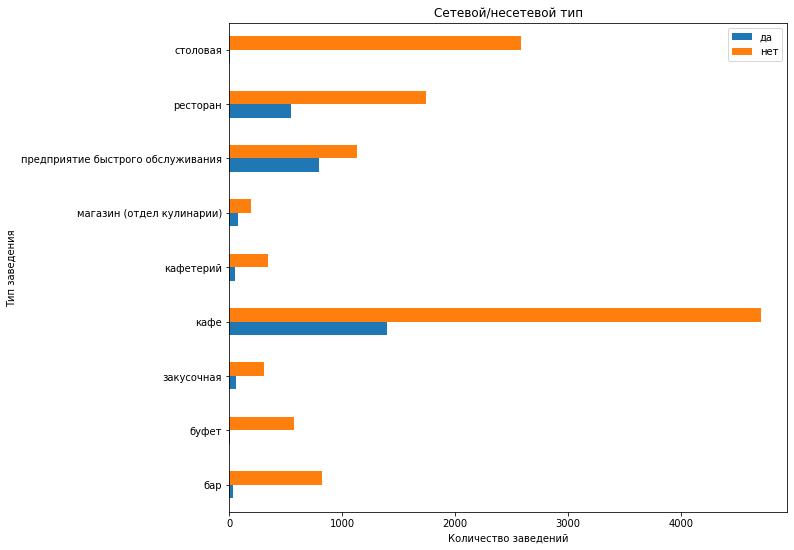

In [14]:
plt.figure(figsize = (20, 40))
rest_data_pivot.plot(kind='barh',figsize=(10, 9))
plt.title('Сетевой/несетевой тип')
plt.xlabel('Количество заведений')
plt.ylabel('Тип заведения')

plt.show()

#### Вывод по графику:
1. Да, как я и говорил в прошлом шаге - столовые не сетевые, да и ресторанов "одиноких" больше.
2. Не предвидел несетвых кафе, хотя сетевых кафе больше всех из сетевых типов объектов.
3. Меньше всех отделов кулинарии - странно, что несетвых кулинарий больше, всегда думал, что они чаще располагаются в рамках сетвых магазинов.

<a name="s_4"></a>
### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
[К оглавлению](#table_of_contents)

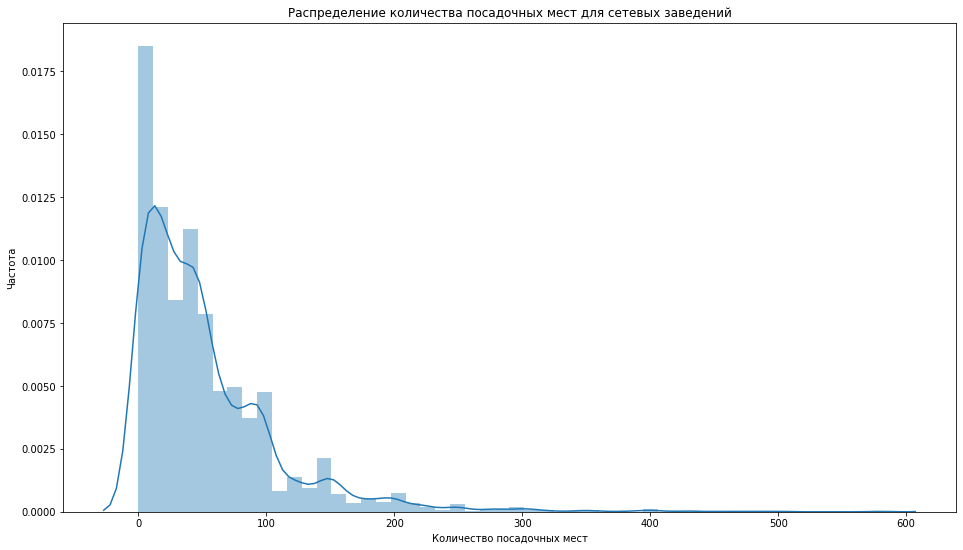

In [15]:
plt.figure(figsize = (16, 9))
ax = sns.distplot(rest_data.query('chain=="да"')['number'], bins=50)
ax.set_title('Распределение количества посадочных мест для сетевых заведений')
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('Частота')
plt.show()

#### Вывод по графику:
Заведений много, но мало мест.
    * Думаю большое количество кафе подпортило статистику :D

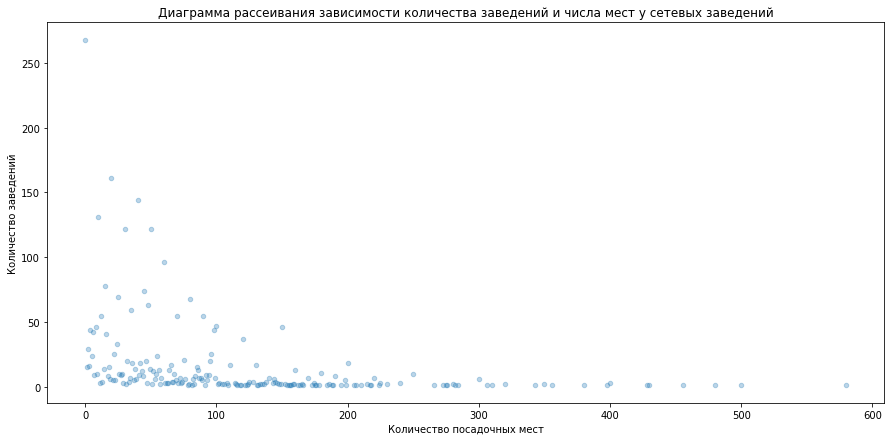

In [16]:
chain = rest_data.query('chain == "да"')
#chain.head()
chain_pivot = chain.pivot_table(index = 'number', values = 'id', aggfunc = 'count').reset_index().sort_values(by= 'id', ascending = False)
chain_pivot.columns = ['number', 'count']
chain_pivot.plot(x='number', y='count', 
            kind ='scatter', alpha = 0.3, figsize=(15,7), title='Диаграмма рассеивания зависимости количества заведений и числа мест у сетевых заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.show()

<a name="s_5"></a>
### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
[К оглавлению](#table_of_contents)

In [17]:
seats_numbers = (rest_data.groupby(['object_type', 'chain'])['number'].mean().reset_index().sort_values(by='number', ascending=False))
seats_numbers

,object_type,chain,number
17,столовая,нет,130.267415
16,столовая,да,112.333333
14,ресторан,да,100.233456
15,ресторан,нет,95.771970
0,бар,да,53.027027
3,буфет,нет,51.865854
6,кафе,да,47.426934
1,бар,нет,43.063492
12,предприятие быстрого обслуживания,да,40.166877
7,кафе,нет,37.427174


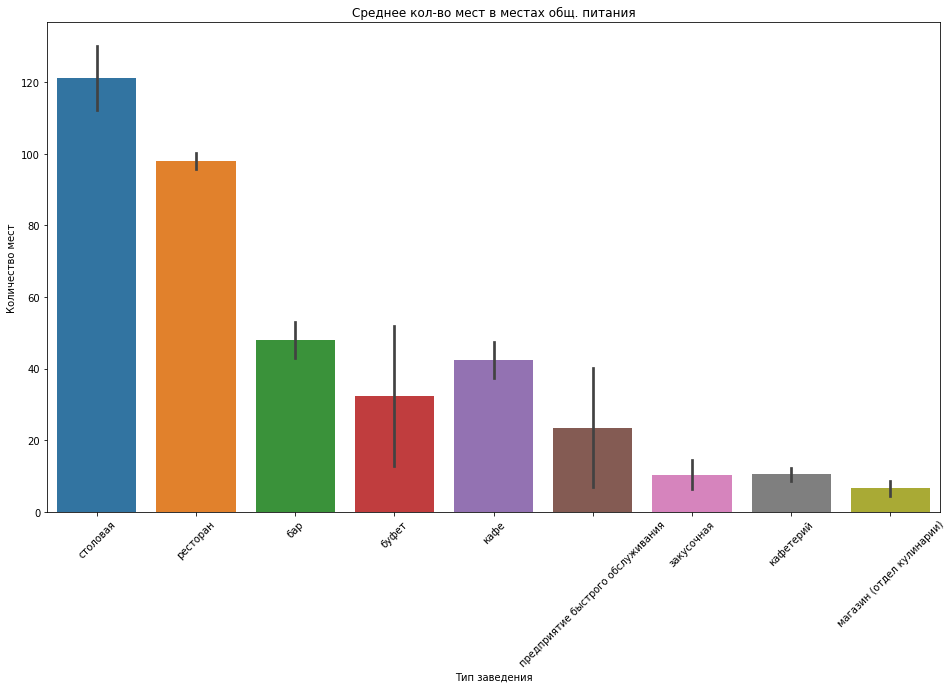

In [18]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x='object_type', y='number', data=seats_numbers)
plt.title('Среднее кол-во мест в местах общ. питания')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show()

#### Вывод по графику:
1. Всё как я и говорил - кафе много, но мест они дают мало.
2. В столовых и ресторанах всё в порядке с местами.
3. Удивительно, что бары смогли втиснуться в тройку лидеров.

<a name="s_6"></a>
### Выделите в отдельный столбец информацию об улице из столбца address 
[К оглавлению](#table_of_contents)

Был вариант достать улицу через .str.extract(r 'город [А-я]+, ([А-Яа-я1-9- ]+)' - но оказалось, что ряд объектов расценивались улицами. Так тоже остаются поселения/города, но в основном массив разделен на город, улицу, дом, а потому при построении диаграмм по улицам можно будет просто исключать поселения и города через query

In [19]:
def get_street(address):
    return address.split(",")[1].strip()

rest_data['street'] = rest_data['address'].apply(get_street)
rest_data.head(10)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


<a name="s_7"></a>
### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
[К оглавлению](#table_of_contents)

[Инструкция по загрузке excel файлов](https://disk.yandex.ru/i/_Y4RFJD4WI3sXw) 

[ссылка на excel в моем гугл диске](https://docs.google.com/spreadsheets/d/1ytmURBdMp0-OjWL2CMrMZPTyCXnEzlCISmZT3m7-cBc/edit?usp=sharing)

In [20]:
spreadsheet_id = '1ytmURBdMp0-OjWL2CMrMZPTyCXnEzlCISmZT3m7-cBc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head()

,ADDRESS,ADM_AREA,DISTRICT
0,"город Москва, Варшавское шоссе, дом 150, строе...",Южный административный округ,муниципальный округ Чертаново Южное
1,"город Москва, Косинская улица, дом 26А",Восточный административный округ,муниципальный округ Вешняки
2,"город Москва, Гороховский переулок, дом 21",Центральный административный округ,муниципальный округ Басманный
3,"город Москва, Тагильская улица, дом 4, строени...",Восточный административный округ,муниципальный округ Метрогородок
4,"город Москва, Ленинградский проспект, дом 73А,...",Северный административный округ,муниципальный округ Сокол


In [21]:
#приведу наименования столбцов к строчным
data_msk = df[['ADDRESS', 'ADM_AREA','DISTRICT']]
data_msk.columns = ['address','adm_area', 'district']
data_msk.head(10)

,address,adm_area,district
0,"город Москва, Варшавское шоссе, дом 150, строе...",Южный административный округ,муниципальный округ Чертаново Южное
1,"город Москва, Косинская улица, дом 26А",Восточный административный округ,муниципальный округ Вешняки
2,"город Москва, Гороховский переулок, дом 21",Центральный административный округ,муниципальный округ Басманный
3,"город Москва, Тагильская улица, дом 4, строени...",Восточный административный округ,муниципальный округ Метрогородок
4,"город Москва, Ленинградский проспект, дом 73А,...",Северный административный округ,муниципальный округ Сокол
...,...,...,...
281995,"город Москва, Западная улица, владение 7/3",Восточный административный округ,муниципальный округ Восточный
281996,"город Москва, Западная улица, владение 7/4",Восточный административный округ,муниципальный округ Восточный
281997,"город Москва, поселение Киевский, посёлок Стан...",Троицкий административный округ,внутригородская территория поселение Киевский
281998,"город Москва, поселение Десеновское, квартал №...",Новомосковский административный округ,внутригородская территория поселение Десеновское


In [22]:
#присоединю к изначальной таблице
rest_data = rest_data.merge(data_msk, on='address', how='left')
rest_data.head(10)

,id,object_name,chain,object_type,address,number,street,adm_area,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Северо-Восточный административный округ,муниципальный округ Ярославский
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,NaN,NaN
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Центральный административный округ,муниципальный округ Таганский
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,Северо-Восточный административный округ,муниципальный округ Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,Северо-Восточный административный округ,муниципальный округ Лианозово
...,...,...,...,...,...,...,...,...,...
15375,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок,Центральный административный округ,муниципальный округ Таганский
15376,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал,Центральный административный округ,муниципальный округ Басманный
15377,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал,Центральный административный округ,муниципальный округ Басманный
15378,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский,Новомосковский административный округ,внутригородская территория поселение Московский


In [23]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15380 entries, 0 to 15379
Data columns (total 9 columns):
id             15380 non-null int64
object_name    15380 non-null object
chain          15380 non-null object
object_type    15380 non-null object
address        15380 non-null object
number         15380 non-null int64
street         15380 non-null object
adm_area       14357 non-null object
district       14357 non-null object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


In [24]:
#дубликаты
rest_data.duplicated().sum()

14

In [25]:
#пропуски
rest_data.isna().sum()

id                0
object_name       0
chain             0
object_type       0
address           0
number            0
street            0
adm_area       1023
district       1023
dtype: int64

Дубликаты есть и пропуски есть, но не буду сейчас что-либо делать, если в процессе что-то возникнет то обязательно исправлю

In [26]:
#создам табличку по улицам/районам с количеством мест.
eat_str = (rest_data.groupby(['street','district']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
)
eat_str.head(10)

,street,district,id
0,Пресненская набережная,муниципальный округ Пресненский,167
1,поселение Сосенское,внутригородская территория поселение Сосенское,121
2,Ходынский бульвар,муниципальный округ Хорошевский,102
3,улица Новый Арбат,муниципальный округ Арбат,92
4,улица Ленинская Слобода,муниципальный округ Даниловский,85
...,...,...,...
2051,Большой Гнездниковский переулок,муниципальный округ Пресненский,1
2052,Большой Афанасьевский переулок,муниципальный округ Хамовники,1
2053,Мамоновский переулок,муниципальный округ Тверской,1
2054,Известковый переулок,муниципальный округ Таганский,1


In [27]:
#Выделяю топ 10 улиц
top10_street = eat_str.query('street !=("город Зеленоград","поселение Сосенское")').groupby('street')['id'].sum().sort_values(ascending=False).head(10).reset_index()
top10_street

,street,id
0,проспект Мира,204
1,Профсоюзная улица,181
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,160
5,Ленинский проспект,146
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,110


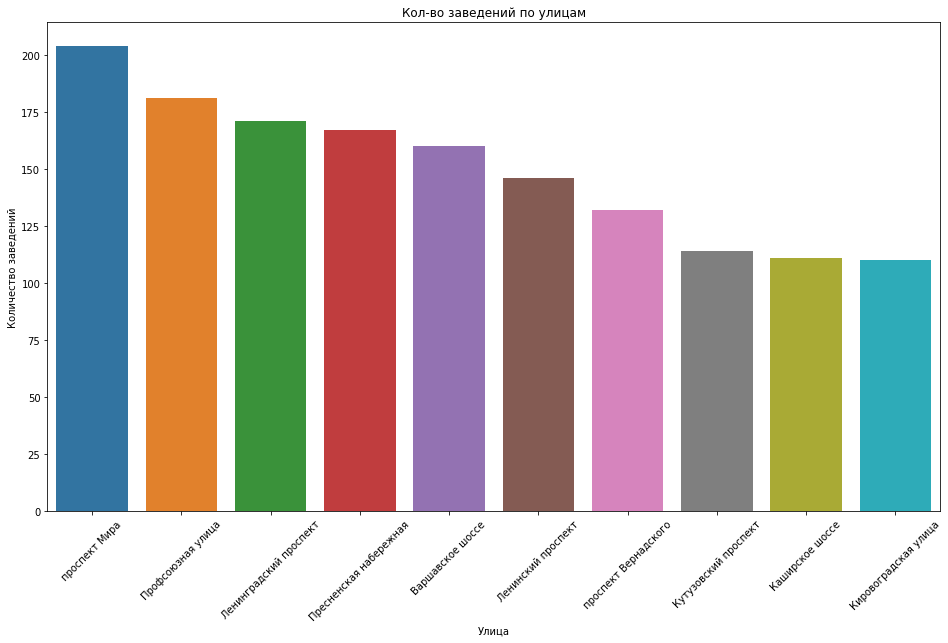

In [28]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x='street', y='id', data=top10_street)
plt.title('Кол-во заведений по улицам')
ax.set_xlabel('Улица')
ax.set_ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.show()

#### Вывод по графику:
В географии Москвы не силен, но что-то знаю:
* Судя по всему на графике отобразились важнейшие места Москвы с точки зрения логистики и общественной жизни горожан и туристов.


In [29]:
#Теперь нужно посмотреть где эти улицы находятся
data1 = rest_data[['street', 'district']]
top10_dist = top10_street.merge(data1, how='left', on='street')
top10_dist.pivot_table(index=['street', 'district']).sort_values(by='id', ascending=False)

id
street                 district                                          
проспект Мира          муниципальный округ Ярославский                204
                       муниципальный округ Свиблово                   204
                       муниципальный округ Ростокино                  204
                       муниципальный округ Останкинский               204
                       муниципальный округ Мещанский                  204
                       муниципальный округ Алексеевский               204
Профсоюзная улица      муниципальный округ Обручевский                181
                       муниципальный округ Академический              181
                       муниципальный округ Коньково                   181
                       муниципальный округ Теплый Стан                181
                       муниципальный округ Черемушки                  181
                       муниципальный округ Ясенево                    181
Ленинградский проспект муниципальный округ Сокол                      171
                       муниципальный округ Хорошевский                171
                       муниципальный округ Аэропорт                   171
                       муниципальный округ Беговой                    171
Пресненская набережная муниципальный округ Пресненский                167
Варшавское шоссе       муниципальный округ Нагатино-Садовники         160
                       муниципальный округ Донской                    160
                       муниципальный округ Чертаново Северное         160
                       муниципальный округ Южное Бутово               160
                       муниципальный округ Нагорный                   160
                       муниципальный округ Чертаново Южное            160
                       муниципальный округ Чертаново Центральное      160
Ленинский проспект     муниципальный округ Якиманка                   146
                       муниципальный округ Гагаринский                146
                       муниципальный округ Обручевский                146
                       муниципальный округ Тропарево-Никулино         146
                       муниципальный округ Теплый Стан                146
                       муниципальный округ Проспект Вернадского       146
                       муниципальный округ Ломоносовский              146
                       муниципальный округ Донской                    146
проспект Вернадского   муниципальный округ Проспект Вернадского       132
                       муниципальный округ Тропарево-Никулино         132
                       муниципальный округ Раменки                    132
                       муниципальный округ Гагаринский                132
                       муниципальный округ Ломоносовский              132
Кутузовский проспект   муниципальный округ Фили-Давыдково             114
                       муниципальный округ Дорогомилово               114
Каширское шоссе        муниципальный округ Москворечье-Сабурово       111
                       муниципальный округ Нагатино-Садовники         111
                       муниципальный округ Орехово-Борисово Южное     111
                       муниципальный округ Орехово-Борисово Северное  111
Кировоградская улица   муниципальный округ Чертаново Северное         110
                       муниципальный округ Чертаново Центральное      110
                       муниципальный округ Чертаново Южное            110

Таблица сверху не столь ясна, снизу я посчитал количество заведений районов одной улицы (которые входят в разные районы): 

In [30]:
top_10_streets = top10_street['street'].to_list()
top10_dist = rest_data.query('street == @top_10_streets')
top10_dist.pivot_table(index=['street', 'district'], values='id', aggfunc='count')

id
street                 district                                          
Варшавское шоссе       муниципальный округ Донской                     34
                       муниципальный округ Нагатино-Садовники           8
                       муниципальный округ Нагорный                    41
                       муниципальный округ Чертаново Северное          23
                       муниципальный округ Чертаново Центральное       13
                       муниципальный округ Чертаново Южное             39
                       муниципальный округ Южное Бутово                 2
Каширское шоссе        муниципальный округ Москворечье-Сабурово        42
                       муниципальный округ Нагатино-Садовники          49
                       муниципальный округ Орехово-Борисово Северное   14
                       муниципальный округ Орехово-Борисово Южное       6
Кировоградская улица   муниципальный округ Чертаново Северное          21
                       муниципальный округ Чертаново Центральное       79
                       муниципальный округ Чертаново Южное             10
Кутузовский проспект   муниципальный округ Дорогомилово                61
                       муниципальный округ Фили-Давыдково              53
Ленинградский проспект муниципальный округ Аэропорт                    65
                       муниципальный округ Беговой                     51
                       муниципальный округ Сокол                       24
                       муниципальный округ Хорошевский                 31
Ленинский проспект     муниципальный округ Гагаринский                 39
                       муниципальный округ Донской                     14
                       муниципальный округ Ломоносовский               12
                       муниципальный округ Обручевский                 32
                       муниципальный округ Проспект Вернадского         2
                       муниципальный округ Теплый Стан                  3
                       муниципальный округ Тропарево-Никулино          20
                       муниципальный округ Якиманка                    24
Пресненская набережная муниципальный округ Пресненский                167
Профсоюзная улица      муниципальный округ Академический               25
                       муниципальный округ Коньково                    34
                       муниципальный округ Обручевский                 32
                       муниципальный округ Теплый Стан                 39
                       муниципальный округ Черемушки                   37
                       муниципальный округ Ясенево                     14
проспект Вернадского   муниципальный округ Гагаринский                  1
                       муниципальный округ Ломоносовский               14
                       муниципальный округ Проспект Вернадского        16
                       муниципальный округ Раменки                     32
                       муниципальный округ Тропарево-Никулино          69
проспект Мира          муниципальный округ Алексеевский                51
                       муниципальный округ Мещанский                   63
                       муниципальный округ Останкинский                20
                       муниципальный округ Ростокино                    7
                       муниципальный округ Свиблово                    62
                       муниципальный округ Ярославский                  1

#### Вывод по графику:
* Судя по всему, как я и говорил, это оказались важные районы Москвы - деловые/бюрократические районы, районы со средними и высшими учебными заведениями, туристические зоны.

<a name="s_8"></a>
### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
[К оглавлению](#table_of_contents)

In [31]:
one_by_str = eat_str.groupby('street').filter(lambda x: x['id'].sum()== 1)
one_by_str

,street,district,id
1439,Новобутовский проезд,муниципальный округ Южное Бутово,1
1440,Карельский бульвар,муниципальный округ Дмитровский,1
1441,3-й проезд Подбельского,муниципальный округ Богородское,1
1443,Костомаровская набережная,муниципальный округ Таганский,1
1445,улица Медиков,муниципальный округ Царицыно,1
...,...,...,...
2050,Изваринская улица,муниципальный округ Внуково,1
2052,Большой Афанасьевский переулок,муниципальный округ Хамовники,1
2053,Мамоновский переулок,муниципальный округ Тверской,1
2054,Известковый переулок,муниципальный округ Таганский,1


500> улиц с единственными объектами общ. питания. Можно объединить по районам и посмотреть сколько их в сумме.

In [32]:
one_by_dist = eat_str.groupby('street').filter(lambda x: x['id'].sum()== 1).groupby('district')['id'].sum().sort_values(ascending=False)
one_by_dist.head(50).to_frame()

,id
district,
муниципальный округ Таганский,27
муниципальный округ Хамовники,26
муниципальный округ Басманный,22
муниципальный округ Тверской,20
муниципальный округ Пресненский,19
муниципальный округ Марьина Роща,17
муниципальный округ Сокольники,15
муниципальный округ Мещанский,12
муниципальный округ Соколиная Гора,12


#### Вывод по графику:
1. Должно быть здесь есть и "новые" районы - такие фронтиры новой застройки.
2. Спальные районы - здесь не особо развит сектор общ. питания.
3. Но есть и прямо близкие к центру.

<a name="s_9"></a>
### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
[К оглавлению](#table_of_contents)

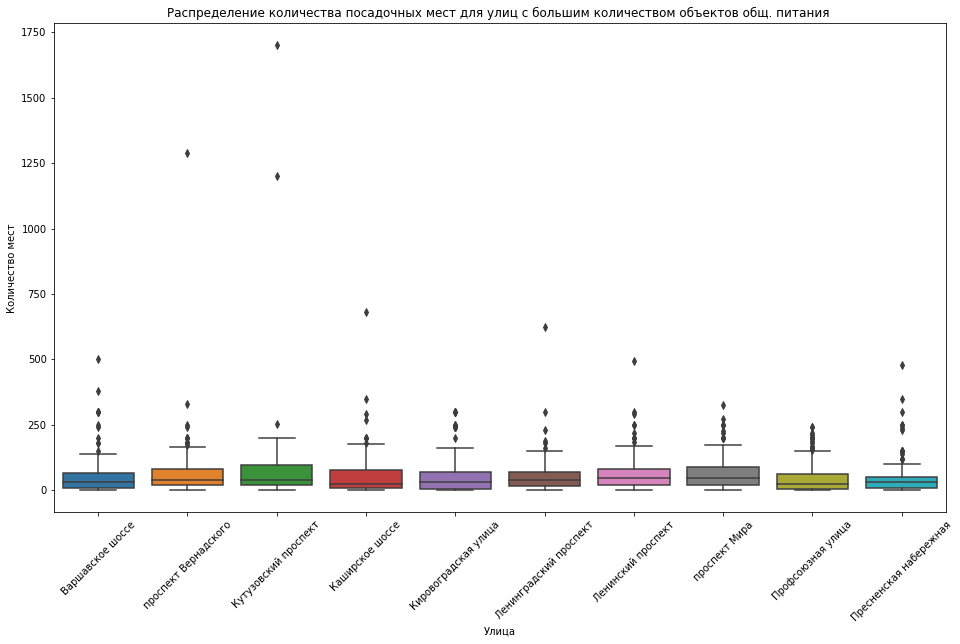

In [33]:
plt.figure(figsize = (16, 9))
ax=sns.boxplot(x='street', y='number', data=rest_data.query('street in @top_10_streets'))
plt.xticks(rotation=45)
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общ. питания ')
ax.set_xlabel('Улица')
ax.set_ylabel('Количество мест')
plt.show()

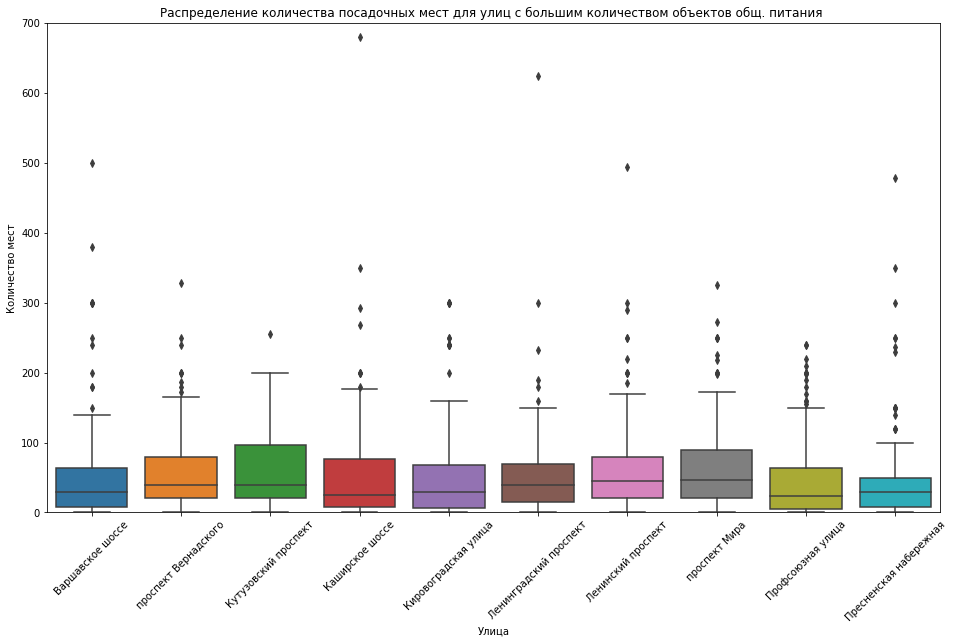

In [34]:
plt.figure(figsize = (16, 9))
ax=sns.boxplot(x='street', y='number', data=rest_data.query('street in @top_10_streets'))
plt.xticks(rotation=45)
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общ. питания ')
ax.set_xlabel('Улица')
ax.set_ylabel('Количество мест')
plt.ylim([0, 700])
plt.show()

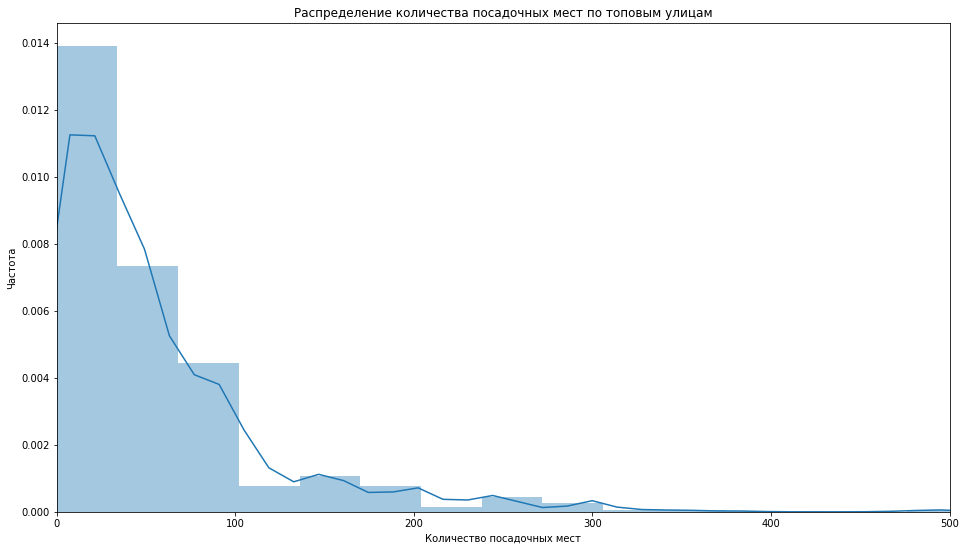

In [35]:
plt.figure(figsize = (16, 9))
ax = sns.distplot(rest_data.query('street in @top_10_streets')['number'], bins=50)
ax.set_title('Распределение количества посадочных мест по топовым улицам')
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('Частота')
plt.xlim(0, 500)
plt.show()

#### Вывод по графику: 
1. Большинство заведений имеют стабильные до 100 мест.
    * Думаю всё дело в цене (аренда, покупка дополнительным кв.м. и т.д.)
2. Интересно, что места кратны 50 - 50, 100, 150, 200, 250 - график строится лесенкой по этим показателям.

<a name="stage_3"></a>
## ШАГ 3. Презентация.
[К оглавлению](#table_of_contents)

[Презентация](https://disk.yandex.ru/i/f90DK2M-qwKuWA)

<a name="stage_4"></a>
## ШАГ 4. Общий вывод и рекомендации.
[К оглавлению](#table_of_contents)

### Общий вывод:
1. В Москве в топ-3 типа объекта общ. питания по количеству заведений лидируют:
    * Кафе
    * Столовые 
    * Рестораны
2. По соотношению мест в топ-3 входят:
    * Столовые
    * Кафе
    * Рестораны.
3. Несетевое распространение превалирует в 4 раза:
    * Сетевых: 2968
    * Несетевых: 12398
4. Сетевой вид распространения чаще используют:
	1. Кафе
	2. Фастфуд.
	3. Рестораны.
Но! Посадочных мест мало.
Большую долю занимают столовые.
5. Среди районов выделились наиболее важные для Москвы:
    * Близкие в к деловым/бюрократическим/производственным центрам.
    * Туристические зоны.
    * Территории близкие или непосредственно сопряженные с средними и высшими учебными заведениями.
6. Большинство заведений имеют стабильные до 100 мест.
    - Думаю всё дело в цене (аренда, покупка дополнительным кв.м. и т.д.)
7. В Москве существует больше 500 улиц с одним объектом общественного питания.
    * Должно быть здесь есть и "новые" районы - такие фронтиры новой застройки.
    * Спальные районы - здесь не особо развит сектор общ. питания.
    * Но есть и прямо близкие к центру.




    


### Рекомендации:
1. Удобнее будет выбрать формат сетевого распространения, для большего охвата аудитории, роста популярности собственного бренда и для разгрузки «главного» заведения.

2. Как формат: кафе – открытая кухня с демонстрацией работы робота. Обслуживание зала не потребует много времени.
    * В будущем можно перепрофилироваться уже в ресторан – усложнить меню, задачи для роботов – это станет своеобразным Ренессансом.
    
3. Нужно подобрать места ближе к деловым центрам или местам с большим скоплением творческих и продвинутых личностей – они могут стать главными посетителями:
    * Деловые люди ценят время, а потому у роботов в таком случае исчезает фактор человеческой ошибки.
    * Люди из «цифрового времени» – здесь скорее сработает фактор личной заинтересованности в самом процессе взаимодействия.
    * Также поначалу: большинство людей будут заинтересованы – это же всё-таки в новый опыт.
